In [60]:
import numpy as np
import torch
from torch import optim
import matplotlib.pyplot as plt
import matplotlib
from torch.utils import data
from torch.optim.lr_scheduler import ExponentialLR
# We're going to use a library called celluloid to make animations that work on colab
try: 
    from celluloid import Camera
except:
    !pip install celluloid

from IPython.display import HTML
import torch
import torch.optim as optim
from celluloid import Camera

# Exploring optimisation of analytic functions

In [61]:
def rastrigin(x, A=0.5):
    return A*len(x) + torch.sum(torch.square(x) - A*torch.cos(2*torch.pi*x))

## SGD

In [62]:
x_sgd = torch.tensor([5.,4.], requires_grad=True)
opt = optim.SGD([x_sgd], lr=0.01)

sgd_losses = []
for i in range(100):
    opt.zero_grad()
    sgd_output = rastrigin(x_sgd)
    sgd_losses.append(sgd_output.item())
    sgd_output.backward()
    opt.step()

## SGD + Momentum

In [63]:
x_sgd_m = torch.tensor([5.,4.], requires_grad=True)
opt = optim.SGD([x_sgd_m], lr=0.01, momentum=0.9)

sgd_m_losses = []
for i in range(100):
    opt.zero_grad()
    sgd_m_output = rastrigin(x_sgd_m)
    sgd_m_losses.append(sgd_m_output.item())
    sgd_m_output.backward()
    opt.step()

## Adagrad

In [64]:
x_ada = torch.tensor([5.,4.], requires_grad=True)
opt = optim.Adagrad([x_ada], lr=0.01)

ada_losses = []
for i in range(100):
    opt.zero_grad()
    ada_output = rastrigin(x_ada)
    ada_losses.append(ada_output.item())
    ada_output.backward()
    opt.step()

## Adam

In [65]:
x_adam = torch.tensor([5.,4.], requires_grad=True)
opt = optim.Adam([x_adam], lr=0.01)

adam_losses = []
for i in range(100):
    opt.zero_grad()
    adam_output = rastrigin(x_adam)
    adam_losses.append(adam_output.item())
    adam_output.backward()
    opt.step()

In [66]:
import pandas as pd
df = pd.DataFrame({"x1": x_sgd[0].item(), 
                   "x2": x_sgd[1].item()}, index=["SGD"])

df = df.append(pd.DataFrame({"x1": x_sgd_m[0].item(), 
                   "x2": x_sgd_m[1].item()}, index=["SGD+m"]))

df = df.append(pd.DataFrame({"x1": x_ada[0].item(), 
                   "x2": x_ada[1].item()}, index=["Adagrad"]))
df = df.append(pd.DataFrame({"x1": x_adam[0].item(), 
                   "x2": x_adam[1].item()}, index=["Adam"]))



df

/var/folders/dn/mf4hn04x4p19pvpk6_8z0_vc0000gn/T/ipykernel_93831/631532462.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"x1": x_sgd_m[0].item(),
/var/folders/dn/mf4hn04x4p19pvpk6_8z0_vc0000gn/T/ipykernel_93831/631532462.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"x1": x_ada[0].item(),
/var/folders/dn/mf4hn04x4p19pvpk6_8z0_vc0000gn/T/ipykernel_93831/631532462.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"x1": x_adam[0].item(),


,x1,x2
SGD,1.614345,1.296486
SGD+m,-0.006480,-0.903172
Adagrad,4.827328,3.831192
Adam,3.953301,2.949120


Text(0.5, 1.0, 'Optimization of the rastrigin function')

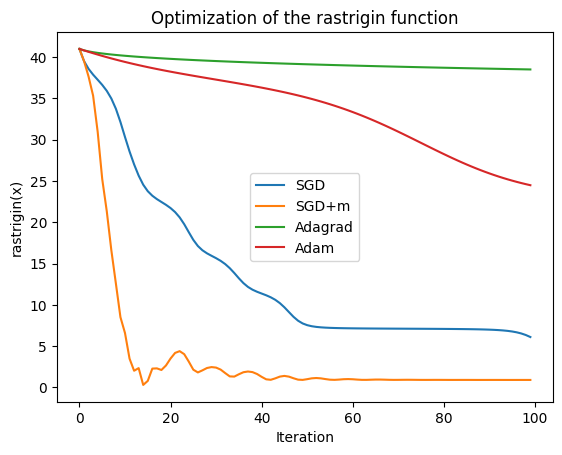

In [104]:
plt.plot(sgd_losses, label="SGD")
plt.plot(sgd_m_losses, label='SGD+m')
plt.plot(ada_losses, label='Adagrad')
plt.plot(adam_losses, label='Adam')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("rastrigin(x)")
plt.title("Optimization of the rastrigin function")

# Iris SVM

In [76]:
def hinge_loss(y_pred, y_true):
    # YOUR CODE HERE
    yz = y_pred * y_true
    return torch.max(torch.zeros(yz.size()),1 - yz).mean()

def svm(x, w, b):
    h = (w*x).sum(1) + b
    return h

In [77]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df = df.sample(frac=1, random_state=0)
df = df[df[4].isin(['Iris-virginica', 'Iris-versicolor'])]
mapping = {k: v for v, k in enumerate(df[4].unique())}
df[5] = (2 * df[4].map(mapping)) - 1
alldata = torch.tensor(df.iloc[:, [0,1,2,3]].values, dtype=torch.float)
alldata = (alldata - alldata.mean(dim=0)) / alldata.var(dim=0)

targets_tr = torch.tensor(df.iloc[:75, 5].values, dtype=torch.long)
targets_va = torch.tensor(df.iloc[75:, 5].values, dtype=torch.long)
data_tr = alldata[:75]
data_va = alldata[75:]

print(data_tr.shape, targets_tr.shape, data_va.shape, targets_va.shape)

torch.Size([75, 4]) torch.Size([75]) torch.Size([25, 4]) torch.Size([25])


In [78]:
def train(x, y, opt='sgd', lr=0.001, epochs=100, batch_size=25, weight_decay=0.0001):
    dataset = data.TensorDataset(x,y) # create your datset
    dataloader = data.DataLoader(dataset, batch_size=batch_size, shuffle=True) # create your dataloader
    
    if opt == 'sgd':
        w = torch.randn(1, x.shape[1], requires_grad=True)
        b = torch.randn(1, requires_grad=True)
        opt = optim.SGD([w,b], lr=lr, weight_decay=weight_decay)
        
    if opt == 'adam':
        w = torch.randn(1, x.shape[1], requires_grad=True)
        b = torch.randn(1, requires_grad=True)
        opt = optim.Adam([w,b], lr=lr, weight_decay=weight_decay)
    
    
    for epoch in range(epochs):
        for batch in dataloader:
            opt.zero_grad()
            loss = hinge_loss(svm(batch[0], w, b), batch[1])
            loss.backward()
            opt.step()
    return (w, b)

In [81]:
def compute_loss(x, y, weights):
    return hinge_loss(svm(x, weights[0], weights[1]), y)

In [82]:
tests = [('sgd', 0.01), ('sgd', 0.001), ('sgd', 0.0001), ('adam', 0.01), ('adam', 0.001), ('adam', 0.0001)]

In [99]:
SAMPLE_SIZE = 100

In [100]:
all_stats = {}

for i, test in enumerate(tests):
    losses = []
    print("test: ", i)
    for i in range(SAMPLE_SIZE):
        weights = train(data_tr, targets_tr, opt=test[0], lr=test[1])
        losses.append(compute_loss(data_va, targets_va, weights=weights).detach().numpy())
    all_stats[test[0] + '_' + str(test[1])] = {'loss_mean':np.mean(losses), "loss_var":np.var(losses)}

test:  0
test:  1
test:  2
test:  3
test:  4
test:  5


In [101]:
all_stats

{'sgd_0.01': {'loss_mean': 0.19376828, 'loss_var': 0.0048933793},
 'sgd_0.001': {'loss_mean': 1.4218146, 'loss_var': 1.7222829},
 'sgd_0.0001': {'loss_mean': 2.1040468, 'loss_var': 3.5632577},
 'adam_0.01': {'loss_mean': 0.20851535, 'loss_var': 0.013904975},
 'adam_0.001': {'loss_mean': 1.3152893, 'loss_var': 1.8074626},
 'adam_0.0001': {'loss_mean': 2.232422, 'loss_var': 3.996035}}

In [102]:
df = pd.DataFrame(all_stats['sgd_0.01'], index=['sgd_0.01'])
df = df.append(pd.DataFrame(all_stats['sgd_0.001'], index=['sgd_0.001']))
df = df.append(pd.DataFrame(all_stats['sgd_0.0001'], index=['sgd_0.0001']))
df = df.append(pd.DataFrame(all_stats['adam_0.01'], index=['adam_0.01']))
df = df.append(pd.DataFrame(all_stats['adam_0.001'], index=['adam_0.001']))
df = df.append(pd.DataFrame(all_stats['adam_0.0001'], index=['adam_0.0001']))

/var/folders/dn/mf4hn04x4p19pvpk6_8z0_vc0000gn/T/ipykernel_93831/3815048713.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(all_stats['sgd_0.001'], index=['sgd_0.001']))
/var/folders/dn/mf4hn04x4p19pvpk6_8z0_vc0000gn/T/ipykernel_93831/3815048713.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(all_stats['sgd_0.0001'], index=['sgd_0.0001']))
/var/folders/dn/mf4hn04x4p19pvpk6_8z0_vc0000gn/T/ipykernel_93831/3815048713.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(all_stats['adam_0.01'], index=['adam_0.01']))
/var/folders/dn/mf4hn04x4p19pvpk6_8z0_vc0000gn/T/ipykernel_93831/3815048713.py:5: FutureWarning: The frame.append method is d

In [103]:
df

,loss_mean,loss_var
sgd_0.01,0.193768,0.004893
sgd_0.001,1.421815,1.722283
sgd_0.0001,2.104047,3.563258
adam_0.01,0.208515,0.013905
adam_0.001,1.315289,1.807463
adam_0.0001,2.232422,3.996035
